### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# for encoding
from sklearn.preprocessing import LabelEncoder

#for visualizing tree
from sklearn.tree import plot_tree

### Loading the dataset

In [2]:
df = pd.read_csv('mushrooms.csv')

### Data Analysis

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# checking for duplicate values

df.duplicated().sum()

0

No duplicate values are present.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# checking for null values

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null values are present.

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.shape

(8124, 23)

Dataset has 8124 rows and 23 columns.

In [9]:
# checking number of unique values in columns

df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [10]:
# we can drop veil-type as it takes only one value

df.drop(columns=['veil-type'], axis=1, inplace=True)

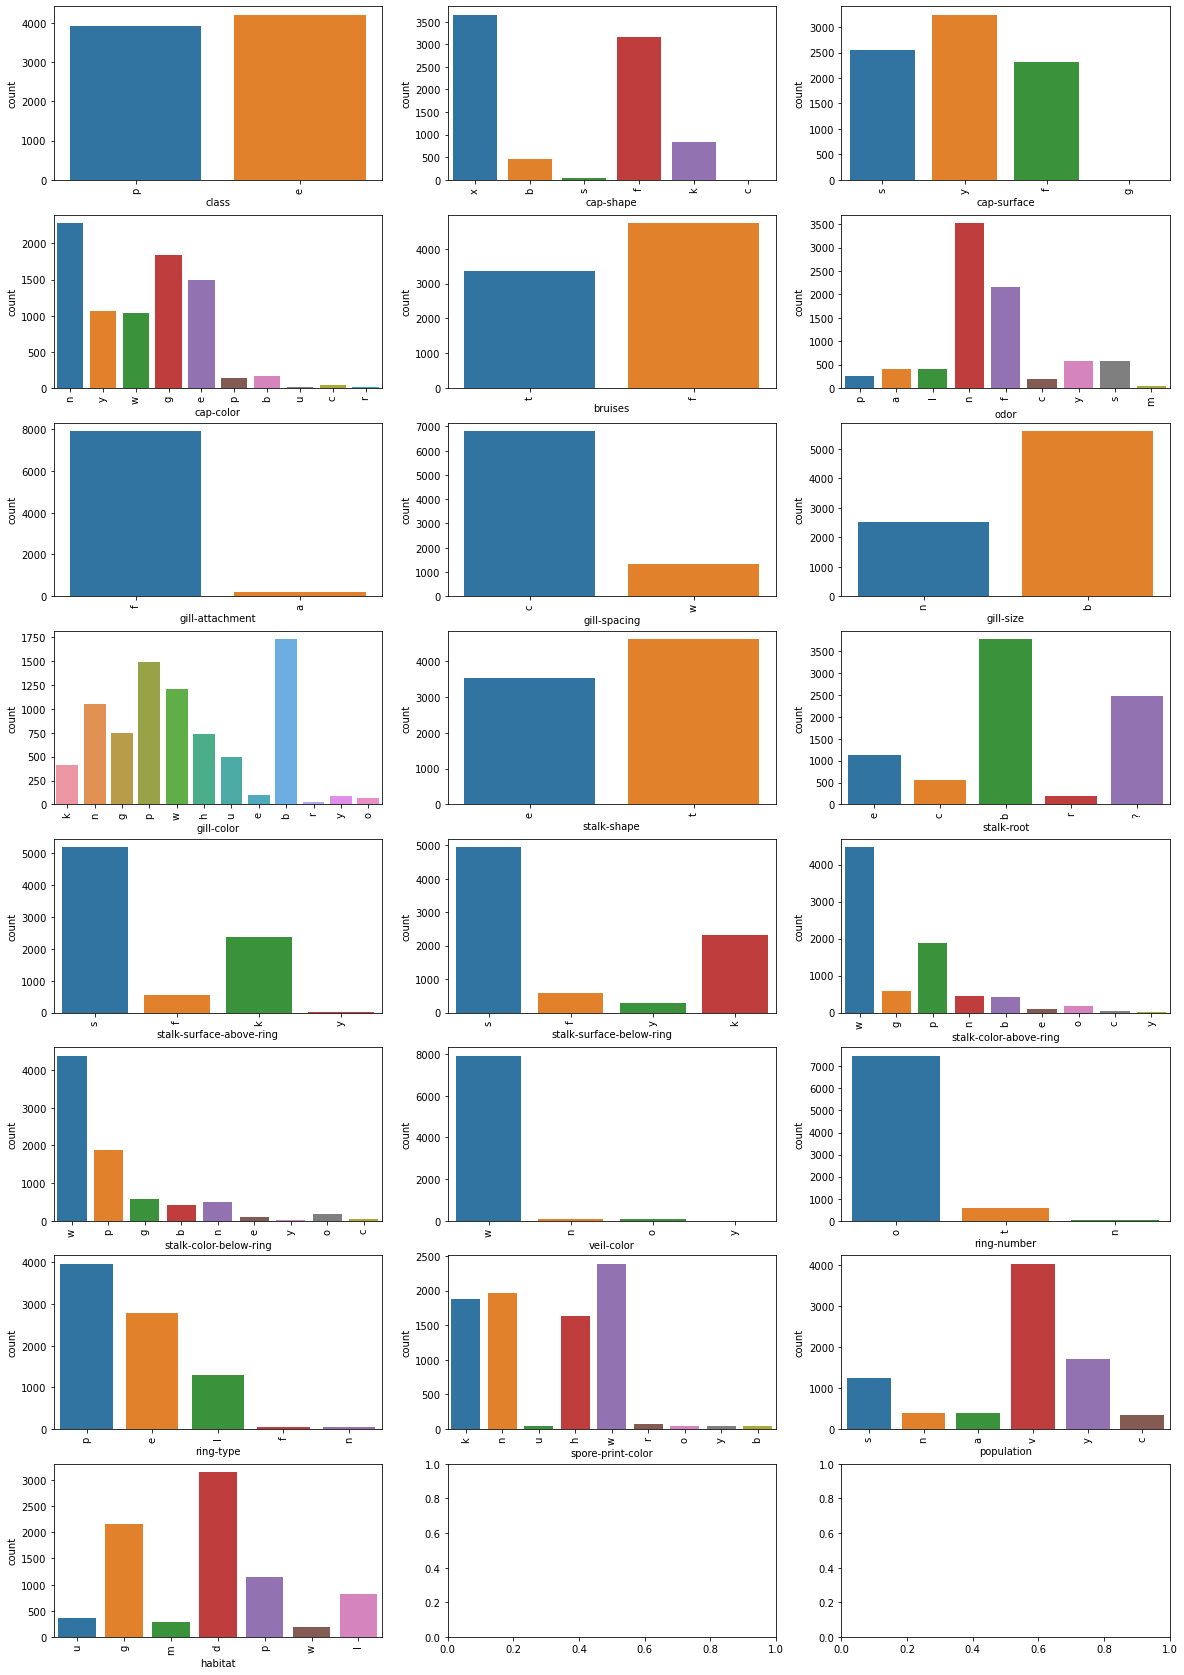

In [11]:
# plotting all the attributes w.r.t its count

fig, ax = plt.subplots(8, 3, figsize=(20, 30))
for variable, subplot in zip(df, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<b> Observations from the above plot:- </b>

<ol>
    <li> There are approximately same number of edible and poisonous mushroom records.
    <li> Maximum number of mushrooms have convex and flat cap-shape.
    <li> Maximum number of mushrooms have scaly cap-surface and high number of mushrooms have fibrous and smooth surface.
    <li> Most mushrooms have brown cap-color and some have gray and red cap-color.
    <li> Most mushrooms don't have bruises.
    <li> Mushrooms with no odor and foul odor are more in number.
    <li> Almost all mushrooms have gill attached.
    <li> In almost all mushrooms gill-spacing is closed.
    <li> Most mushrooms have gill-size broad and some have narrow.
    <li> Most common gill-colors are buff, pink, white and brown.
    <li> Stalk-shape of most of the mushrooms is tapering and for others it's enlarged.
    <li> Stalk-root for most mushrooms is bulbrous but for many it's not known.
    <li> Stalk-surface-above-ring is smooth for maximum mushrooms and for some it's silky.
    <li> Stalk-surface-below-ring is also smooth for maximum mushrooms and for some it's silky.
    <li> Stalk-color-above-ring is white for most mushrooms and pink for some.
    <li> Stalk-color-below-ring is white for most mushrooms and pink for some.
    <li> Most of the mushrooms have white veil-color.
    <li> Maximum mushrooms have only one ring.
    <li> Pendant is the most common ring-type followed by evanescent and large.
    <li> White, brown, black and chocolate are most common spore-print-color.
    <li> Highest population is several followed vy solitary.
    <li> Most common habitat is woods followed by grasses.
</ol>

In [12]:
# was working before. no idea about the error
# plt.figure(figsize = (10,15))
# sns.heatmap(data=df.corr())

<b> Observations form the plot:- </b>
    
<ol>
    <li> gill-attachment and veil-color are moderately related to each other.
    <li> Most of the attributes are have a very less correlation with each other.
</ol>

In [13]:
# label encoding for converting values to integer

def label_encoding(feature):
    le = LabelEncoder()
    le.fit(feature)
    print(feature.name, le.classes_)
    return le.transform(feature)

In [14]:
for col in df.columns:
    df[str(col)] = label_encoding(df[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


<b> For 'class', 1 denotes poisonous and 0 denotes edible. </b>

In [15]:
# It is good practice not to drop or add a new column to the original dataset. 
# Make a copy of it and then modify it so in case things don’t work out as we expected, 
# we have the original data to start again with a different approach.

target = df['class']

df1 = df.copy()
df1 = df1.drop('class', axis =1)
df1.shape

(8124, 21)

In [16]:
df1.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [17]:
target

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [18]:
X = df1
y = target

In [19]:
# splitting the dataset into training and testing by 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6499, 21) (1625, 21) (6499,) (1625,)


In [20]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



[[827   0]
 [  0 798]]


Text(0.5, 1.0, 'Accuracy Score: 1.0')

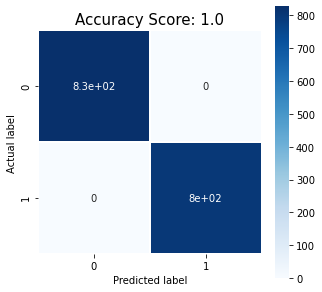

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [24]:
accuracy_score(y_pred, y_test)

1.0

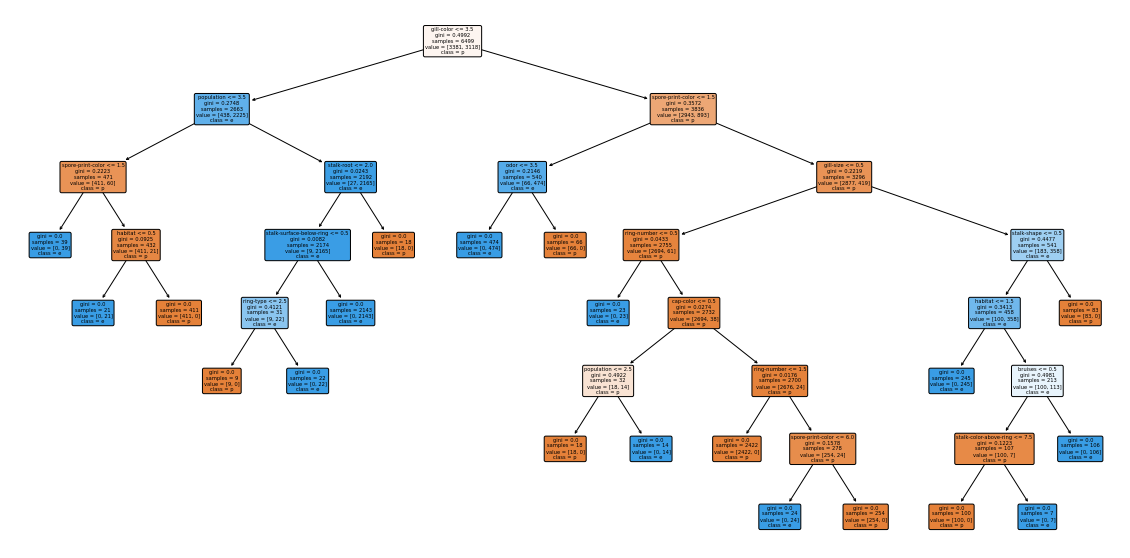

In [25]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,10))
dec_tree = plot_tree(decision_tree=model, feature_names = df1.columns, 
                     class_names =["p", "e"] , filled = True , precision = 4, rounded = True)